In [14]:
%matplotlib inline

#Importing Functions and Libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import pydataset as data
from itertools import combinations

#Importing pre-written scripts to streamline data acquisition and cleaning:
from acquire import get_zillow_data
from prepare import clean_telco_data, prep_telco_data
from env import get_db_url
from stats_toolkit import significance_test
from wrangle import wrangle_zillow, clearing_fips

In [2]:
#Acquiring the data, wrangling it, and saving it to a dataframe:
df = wrangle_zillow()
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,propertylandusedesc,county
4,4,2.0,3633.0,296425.0,2005,6941.39,Single Family Residential,Los Angeles County
6,3,4.0,1620.0,847770.0,2011,10244.94,Single Family Residential,Los Angeles County
7,3,2.0,2077.0,646760.0,1926,7924.68,Single Family Residential,Los Angeles County
11,0,0.0,1200.0,5328.0,1972,91.60,Single Family Residential,Los Angeles County
14,0,0.0,171.0,6920.0,1973,255.17,Single Family Residential,Los Angeles County
...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375.0,422400.0,2015,13877.56,Single Family Residential,Los Angeles County
2152858,4,3.0,2262.0,960756.0,2015,13494.52,Single Family Residential,Orange County
2152859,4,4.5,3127.0,536061.0,2014,6244.16,Single Family Residential,Orange County
2152861,3,2.5,1974.0,424353.0,2015,5302.70,Single Family Residential,Orange County


### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [6]:
train_and_validate, test = train_test_split(df, test_size = .2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size = .3, random_state = 123)

# Exercises:

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair. 

In [41]:
def plot_variable_pairs(df):
    features = df.select_dtypes(include = 'number').columns.tolist()
    pairs = combinations(features, 2)
    for pair in pairs:
        print(pair)
        sns.lmplot(x = pair[0], y = pair[1], line_kws={'color':'red'}, data = df.sample(100000))
        plt.show();

('bedroomcnt', 'bathroomcnt')


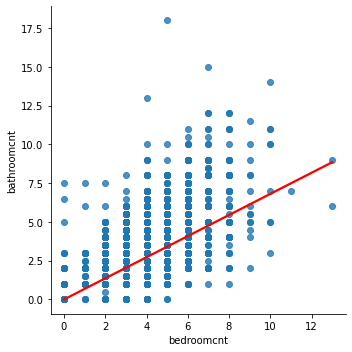

('bedroomcnt', 'calculatedfinishedsquarefeet')


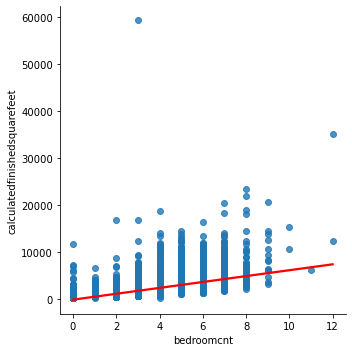

('bedroomcnt', 'taxvaluedollarcnt')


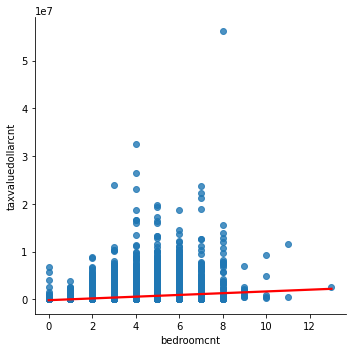

('bedroomcnt', 'yearbuilt')


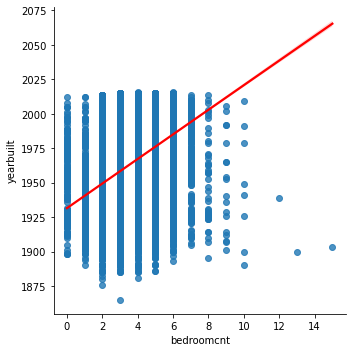

('bedroomcnt', 'taxamount')


In [ ]:
plot_variable_pairs(df)